## Resolver el problema del Mnist con Redes neuronales multicapa

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

Descargando el dataset **mnist**

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


El dataset $\mathcal{D}$ está formado por las entradas $\mathbf{\mathcal{X}}$ y las salidas $\mathcal{Y}$. Donde $\mathbf{\mathcal{X}}$ tiene 70000 ejemplos con 784 componentes (features)

In [4]:
print('X tiene forma de : ', np.shape(X))
print('y tiene forma de : ', np.shape(y))

X tiene forma de :  (70000, 784)
y tiene forma de :  (70000,)


In [5]:
X[0:5,100:105]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [6]:
y[0:5]

array(['5', '0', '4', '1', '9'], dtype=object)

In [7]:
max_x = np.max(X[0,:])
max_x

255.0

In [8]:
X = X/max_x

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_train))
print(y_train[0:5])

(56000, 784)
['5' '4' '8' '0' '2']


Cual es el valor máximo que tiene **X**

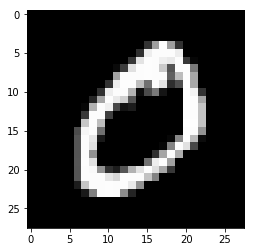

In [10]:
ejemplo_1 = X[1,:].reshape(28,28)
plt.imshow(ejemplo_1, cmap='gray')

In [11]:
red_mnist = MLPClassifier(hidden_layer_sizes=(50,), 
                          max_iter=1000,
                          alpha=1e-4,
                          solver='sgd',
                          verbose=10,
                          tol=1e-4,
                          random_state=1,
                          learning_rate_init=0.1,
                          early_stopping=True)

In [12]:
red_mnist.fit(X_train, y_train)

Iteration 1, loss = 0.34063459
Validation score: 0.935536
Iteration 2, loss = 0.16452324
Validation score: 0.950357
Iteration 3, loss = 0.12467594
Validation score: 0.960714
Iteration 4, loss = 0.09929109
Validation score: 0.961607
Iteration 5, loss = 0.08434841
Validation score: 0.966429
Iteration 6, loss = 0.07340417
Validation score: 0.967143
Iteration 7, loss = 0.06300494
Validation score: 0.966250
Iteration 8, loss = 0.05522086
Validation score: 0.968214
Iteration 9, loss = 0.05021341
Validation score: 0.970536
Iteration 10, loss = 0.04554517
Validation score: 0.968036
Iteration 11, loss = 0.04034108
Validation score: 0.968214
Iteration 12, loss = 0.03605949
Validation score: 0.970357
Iteration 13, loss = 0.03326069
Validation score: 0.968571
Iteration 14, loss = 0.02900176
Validation score: 0.970536
Iteration 15, loss = 0.02576854
Validation score: 0.970357
Iteration 16, loss = 0.02451592
Validation score: 0.969643
Iteration 17, loss = 0.02287873
Validation score: 0.966607
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

Rendimiento del entrenamiento

In [13]:
red_mnist.score(X_train, y_train)


0.9868571428571429

Rendimiento del testeo

In [14]:
red_mnist.score(X_test, y_test)

0.9689285714285715

In [23]:
import random
muestra = random.randint(0, len(X_test))
muestra

11530

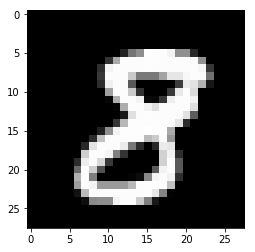

In [24]:
X_muestra = X_test[muestra,:]
X_grafico = X_muestra
plt.imshow(X_grafico.reshape(28,28), cmap='gray')

In [25]:
y_pred = red_mnist.predict(X_muestra.reshape(1,-1))
y_pred

array(['8'], dtype='<U1')